In [ ]:
!wget http://cb.lk/covid_19
!unzip covid_19

--2022-08-14 21:10:19--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-08-14 21:10:19--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|104.21.72.203|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-08-14 21:10:19--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022

In [ ]:
import keras
from keras.models import *
from keras.layers import *
from keras.preprocessing import image
import PIL

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
        '/content/CovidDataset/Train/',
        target_size=(224, 224),batch_size=32,class_mode='binary',
        shuffle=False)


test_set = test_datagen.flow_from_directory(
        '/content/CovidDataset/Val/',
        target_size=(224, 224),batch_size=32,class_mode='binary',
        shuffle=False)


Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
train_set.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_set.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
model=keras.Sequential()
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4,4), padding="same", activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
model.add(Conv2D(256, (5, 5),strides=(1,1),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))
model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))
model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer="sgd", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [ ]:
results=model.fit( train_set, epochs=10,validation_data=test_set,steps_per_epoch=7,validation_steps=2) # lw m7ttsh l gomlten dol l accuracy mara ttl3 sa7 f l evaluate w mara la


Epoch 1/10
7/7 [==============================] - 20s 1s/step - loss: 0.7026 - accuracy: 0.5000 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 7s 1s/step - loss: 0.6975 - accuracy: 0.2143 - val_loss: 0.6873 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 7s 1s/step - loss: 0.6950 - accuracy: 0.5268 - val_loss: 0.6856 - val_accuracy: 0.6167
Epoch 4/10
7/7 [==============================] - 7s 1s/step - loss: 0.6931 - accuracy: 0.5536 - val_loss: 0.6840 - val_accuracy: 0.6000
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 0.6913 - accuracy: 0.5938 - val_loss: 0.6822 - val_accuracy: 0.5333
Epoch 6/10
7/7 [==============================] - 7s 998ms/step - loss: 0.6894 - accuracy: 0.5625 - val_loss: 0.6804 - val_accuracy: 0.5167
Epoch 7/10
7/7 [==============================] - 7s 1s/step - loss: 0.6892 - accuracy: 0.5268 - val_loss: 0.6779 - val_accuracy: 0.5500
Epoch 8/10
7/7 [=====================

In [ ]:
model.evaluate(train_set)

7/7 [==============================] - 5s 782ms/step - loss: 0.6688 - accuracy: 0.9688


[0.6687888503074646, 0.96875]

In [ ]:
model.evaluate(test_set)

2/2 [==============================] - 2s 534ms/step - loss: 0.6693 - accuracy: 0.9833


[0.6693155765533447, 0.9833333492279053]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from keras.models import save_model
model.save('/content/drive/MyDrive/SavedModels/AlexNet_Covid19_binary.h5')

Mounted at /content/drive


In [ ]:
y_pred= (model.predict(test_set)>=0.5).astype(int)

In [ ]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(test_set.labels,y_pred))
print(accuracy_score(test_set.labels,y_pred)*100)


[[29  1]
 [ 0 30]]
98.33333333333333


Text(0.5, 0, 'epoch')

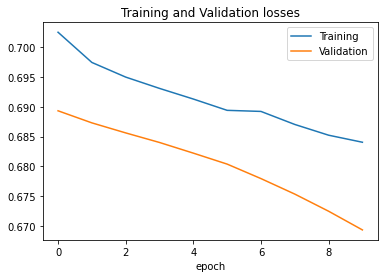

In [ ]:
import matplotlib.pyplot as plt

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
#plt.ylim([0,1])

Text(0.5, 0, 'epoch')

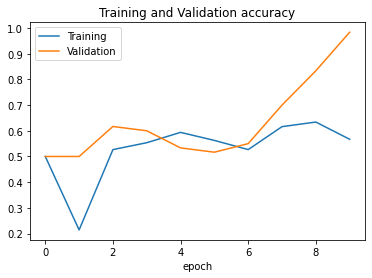

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
#plt.ylim([0,1])